In [2]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Add, Activation

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Question 1

In [4]:
np.random.seed(406)

base_dir = "/content/drive/My Drive/kvasir-dataset-v2"
classes = ['dyed-lifted-polyps',           'dyed-resection-margins',           'esophagitis',           'normal-cecum',           'normal-pylorus',           'normal-z-line',           'polyps',           'ulcerative-colitis']

for cl in classes:
    
    img_path = os.path.join(base_dir, cl)
    images = glob.glob(img_path + '/*.jpg')
    print("{}: {} Images".format(cl, len(images)))
    
    np.random.shuffle(images)    # Shuffle the images randomly
    
    train_list, val_list, test_list = images[:round(len(images)*0.7)], images[round(len(images)*0.7):round(len(images)*0.85)], images[round(len(images)*0.85):]

    for image in train_list:
        if not os.path.exists(os.path.join(base_dir, 'train', cl)):
            os.makedirs(os.path.join(base_dir, 'train', cl))
        shutil.move(image, os.path.join(base_dir, 'train', cl))

    for image in val_list:
        if not os.path.exists(os.path.join(base_dir, 'val', cl)):
            os.makedirs(os.path.join(base_dir, 'val', cl))
        shutil.move(image, os.path.join(base_dir, 'val', cl))
        
    for image in test_list:
        if not os.path.exists(os.path.join(base_dir, 'test', cl)):
            os.makedirs(os.path.join(base_dir, 'test', cl))
        shutil.move(image, os.path.join(base_dir, 'test', cl))


dyed-lifted-polyps: 0 Images
dyed-resection-margins: 0 Images
esophagitis: 0 Images
normal-cecum: 0 Images
normal-pylorus: 0 Images
normal-z-line: 0 Images
polyps: 0 Images
ulcerative-colitis: 0 Images


Question 3

Found 5608 images belonging to 8 classes.
Found 1202 images belonging to 8 classes.
Epoch 1/3
175/175 [==============================] - 1513s 9s/step - loss: 46.1663 - accuracy: 0.4555 - val_loss: 8.4508 - val_accuracy: 0.1562
Epoch 2/3
175/175 [==============================] - 1510s 9s/step - loss: 4.8310 - accuracy: 0.5807 - val_loss: 4.2440 - val_accuracy: 0.4350
Epoch 3/3
175/175 [==============================] - 1501s 9s/step - loss: 2.2289 - accuracy: 0.6006 - val_loss: 1.5514 - val_accuracy: 0.5490


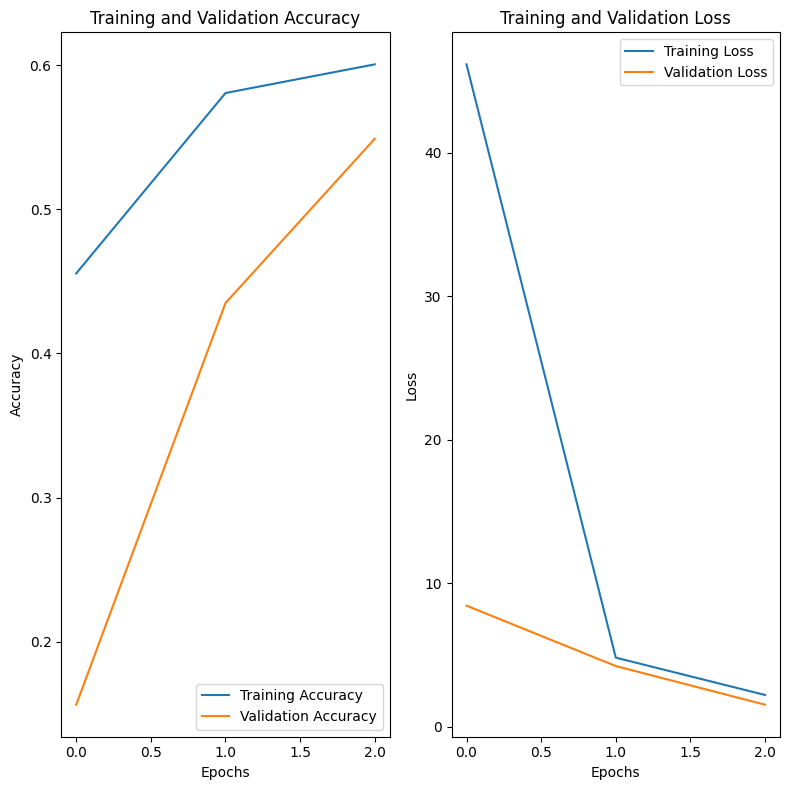

In [6]:
new_input_shape = (224, 224, 3)
len_classes = len(classes)

inputs = Input(shape=new_input_shape)

x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

residual = x

x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x, residual])
x = Activation('relu')(x)

residual = x

x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv2D(64, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x, residual])
x = Activation('relu')(x)

x = Flatten()(x)

x = Dense(512, activation='relu')(x)
outputs = Dense(len_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy',   # Compile the model
              optimizer='adam',
              metrics=['accuracy'])

train_data_generator = ImageDataGenerator(rescale=1.0/255.0,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)

batch_size = 32     # Set the batch size and image directories
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_data = train_data_generator.flow_from_directory(train_dir,
                                                     target_size=new_input_shape[:2],
                                                     batch_size=batch_size,
                                                     class_mode='categorical')

test_data = test_data_generator.flow_from_directory(test_dir,
                                                   target_size=new_input_shape[:2],
                                                   batch_size=batch_size,
                                                   class_mode='categorical')

epochs = 3   # Set the number of epochs

history = model.fit(train_data,
                    steps_per_epoch=train_data.samples // batch_size,
                    epochs=epochs,
                    validation_data=test_data,
                    validation_steps=test_data.samples // batch_size)

new_accuracy = history.history['accuracy']
value_accuracy = history.history['val_accuracy']
new_loss = history.history['loss']
value_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), new_accuracy, label='Training Accuracy')
plt.plot(range(epochs), value_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), new_loss, label='Training Loss')
plt.plot(range(epochs), value_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


Question 4

In [ ]:
new_input_shape = (224, 224, 3)
len_classes = len(classes)

# Model Variation 1: Reduced Number of Layers
inputs1 = Input(shape=new_input_shape)
x1 = Conv2D(64, (3, 3), padding='same')(inputs1)
x1 = BatchNormalization()(x1)
x1 = Activation('relu')(x1)
x1 = Conv2D(64, (3, 3), padding='same')(x1)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2))(x1)
x1 = Flatten()(x1)
x1 = Dense(256, activation='relu')(x1)
outputs1 = Dense(len_classes, activation='softmax')(x1)

# Model Variation 2: Decreased Number of Filters
inputs2 = Input(shape=new_input_shape)
x2 = Conv2D(32, (3, 3), padding='same')(inputs2)
x2 = BatchNormalization()(x2)
x2 = Activation('relu')(x2)
x2 = Conv2D(32, (3, 3), padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(64, (3, 3), padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = Conv2D(128, (3, 3), padding='same')(x2)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2))(x2)
x2 = Flatten()(x2)
x2 = Dense(512, activation='relu')(x2)
outputs2 = Dense(len_classes, activation='softmax')(x2)

model1 = tf.keras.Model(inputs=inputs1, outputs=outputs1)
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2 = tf.keras.Model(inputs=inputs2, outputs=outputs2)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_data_generator = ImageDataGenerator(rescale=1.0/255.0,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)
test_data_generator = ImageDataGenerator(rescale=1.0/255.0)

batch_size = 32
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

train_data = train_data_generator.flow_from_directory(train_dir,
                                                     target_size=new_input_shape[:2],
                                                     batch_size=batch_size,
                                                     class_mode='categorical')

test_data = test_data_generator.flow_from_directory(test_dir,
                                                   target_size=new_input_shape[:2],
                                                   batch_size=batch_size,
                                                   class_mode='categorical')

epochs = 3

history1 = model1.fit(train_data,
                      steps_per_epoch=train_data.samples // batch_size,
                      epochs=epochs,
                      validation_data=test_data,
                      validation_steps=test_data.samples // batch_size)

history2 = model2.fit(train_data,
                      steps_per_epoch=train_data.samples // batch_size,
                      epochs=epochs,
                      validation_data=test_data,
                      validation_steps=test_data.samples // batch_size)

new_accuracy1 = history1.history['accuracy']
val_accuracy1 = history1.history['val_accuracy']
new_loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

new_accuracy2 = history2.history['accuracy']
val_accuracy2 = history2.history['val_accuracy']
new_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), new_accuracy1, label='Training Accuracy (Model 1)')
plt.plot(range(epochs), val_accuracy1, label='Validation Accuracy (Model 1)')
plt.plot(range(epochs), new_accuracy2, label='Training Accuracy (Model 2)')
plt.plot(range(epochs), val_accuracy2, label='Validation Accuracy (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), new_loss1, label='Training Loss (Model 1)')
plt.plot(range(epochs), val_loss1, label='Validation Loss (Model 1)')
plt.plot(range(epochs), new_loss2, label='Training Loss (Model 2)')
plt.plot(range(epochs), val_loss2, label='Validation Loss (Model 2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()


Found 5608 images belonging to 8 classes.
Found 1202 images belonging to 8 classes.
Epoch 1/3
175/175 [==============================] - 4225s 24s/step - loss: 16.9186 - accuracy: 0.2782 - val_loss: 20.3829 - val_accuracy: 0.1461
Epoch 2/3
175/175 [==============================] - 4220s 24s/step - loss: 2.8140 - accuracy: 0.3011 - val_loss: 17.0716 - val_accuracy: 0.1368
Epoch 3/3
175/175 [==============================] - 4207s 24s/step - loss: 1.9188 - accuracy: 0.3325 - val_loss: 1.6905 - val_accuracy: 0.3742
Epoch 1/3
